In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

Sun Mar 03 2019 

CPython 3.6.8
IPython 7.2.0

numpy 1.14.6
scipy 1.1.0
sklearn 0.20.1
pandas 0.24.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.20.5-arch1-1-ARCH
machine    : x86_64
processor  : 
CPU cores  : 16
interpreter: 64bit


In [2]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import os
import nolds
import data
import mne
import matplotlib.pyplot as plt
from data.data_files import CHANNEL_NAMES, DataKind, files_builder

# PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
PROJ_ROOT = os.getenv('THESIS_ROOT')
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'

raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '75b.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
# data = np.transpose(data.values)
metapkl = pd.read_pickle(os.path.join(LABELED_ROOT, 'processed', 'meta', 'meta.pkl'))
metapkl

Opening raw data file /home/kovar/thesis_project/data/processed/75b.fif...
This filename (/home/kovar/thesis_project/data/processed/75b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 35665 =      0.000 ...   142.660 secs
Ready.


<ipython-input-2-58cf8d0badbf>:27: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/75b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '75b.fif'))


resp b/a sex  age    sc  sc_bef  sc_aft dep dep_bef dep_aft  \
patient trial                                                               
1       a        1   0   0   49  26.0      26      13   0       0      -1   
        b        1   1   0   49  13.0      26      13  -1       0      -1   
2       a       -1   0   0   36  31.0      31      30   1       1       1   
        b       -1   1   0   36  30.0      31      30   1       1       1   
3       a        1   0   0   48  25.0      25       7   0       0      -1   
        b        1   1   0   48   7.0      25       7  -1       0      -1   
4       a       -1   0   0   55  26.0      26      25   0       0       0   
        b       -1   1   0   55  25.0      26      25   0       0       0   
5       a       -1   0   0   35  26.0      26      37   0       0       1   
        b       -1   1   0   35  37.0      26      37   1       0       1   
6       a        0   0   0   37  31.0      31      17   1       1      -1   
        b        0   1   0   37  17.0      31      17  -1       1      -1   
7       a       -1   0   0   63  30.0      30      25   1       1       0   
        b       -1   1   0   63  25.0      30      25   0       1       0   
8       a        1   0   1   50  24.0      24      11   0       0      -1   
        b        1   1   1   50  11.0      24      11  -1       0      -1   
9       a       -1   0   1   59  34.0      34      27   1       1       0   
        b       -1   1   1   59  27.0      34      27   0       1       0   
10      a        1   0   0   49  36.0      36      17   1       1      -1   
        b        1   1   0   49  17.0      36      17  -1       1      -1   
11      a       -1   0   1   53  27.0      27      26   0       0       0   
        b       -1   1   1   53  26.0      27      26   0       0       0   
12      a        1   0   1   59  30.0      30      12   1       1      -1   
        b        1   1   1   59  12.0      30      12  -1       1      -1   
13      a        1   0   0   57  26.0      26       7   0       0      -1   
        b        1   1   0   57   7.0      26       7  -1       0      -1   
14      a        0   0   0   30  28.0      28      17   1       1      -1   
        b        0   1   0   30  17.0      28      17  -1       1      -1   
15      a        1   0   0   35  25.0      25       3   0       0      -1   
        b        1   1   0   35   3.0      25       3  -1       0      -1   
...            ...  ..  ..  ...   ...     ...     ...  ..     ...     ...   
119     a        1   0   1   61  23.0      23       4   0       0      -1   
        b        1   1   1   61   4.0      23       4  -1       0      -1   
120     a       -1   0   0   41  28.0      28      19   1       1       0   
        b       -1   1   0   41  19.0      28      19   0       1       0   
121     a       -1   0   0   34  24.0      24      26   0       0       0   
        b       -1   1   0   34  26.0      24      26   0       0       0   
122     a        0   0   1   55  35.0      35      19   1       1       0   
        b        0   1   1   55  19.0      35      19   0       1       0   
123     a       -1   0   1   54  24.0      24      25   0       0       0   
        b       -1   1   1   54  25.0      24      25   0       0       0   
124     a       -1   0   0   52  30.0      30      23   1       1       0   
        b       -1   1   0   52  23.0      30      23   0       1       0   
125     a        1   0   0   56  26.0      26      11   0       0      -1   
        b        1   1   0   56  11.0      26      11  -1       0      -1   
126     a       -1   0   0   40  25.0      25      17   0       0      -1   
        b       -1   1   0   40  17.0      25      17  -1       0      -1   
127     a       -1   0   0   35  25.0      25      21   0       0       0   
        b       -1   1   0   35  21.0      25      21   0       0       0   
128     a        1   0   0   51  21.0      21       9   0       0      -1   
        b 

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from data.data_files import CHANNEL_NAMES, DataKind, files_builder

def plot_psd(X, label, Fs, NFFT, color=None):

    noverlap = int(NFFT * 0.8)

    freqs, psd = welch(X, fs=Fs, window='hann', nperseg=NFFT,
                       noverlap=noverlap)

    f = freqs[freqs > np.zeros(len(freqs))]
    psd = psd[freqs > np.zeros(len(freqs))]

    plt.plot(f, psd.ravel(), label=label, color=color)

for file in files_builder(DataKind('processed')):
    plt.figure(figsize=(9, 6))
    values = file.df['FP1'][:15000]
    sfreq=250
    print(metapkl.loc[(file.id, file.trial), :])
    n_fft = 2 ** 10  # let's use long windows to see low frequencies
    plot_psd(values, Fs=sfreq, NFFT=n_fft, label='EEG', color='black')

    plt.legend()
    plt.xticks(np.arange(0, 50, 2))
    plt.xlim([0, 50])
    plt.ylim([0, 50])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power Spectral Density')
    plt.grid()
    plt.show()


Opening raw data file /home/kovar/thesis_project/data/processed/44a.fif...
This filename (/home/kovar/thesis_project/data/processed/44a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/44a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


NameError: name 'metapkl' is not defined

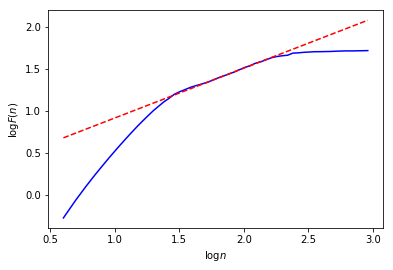

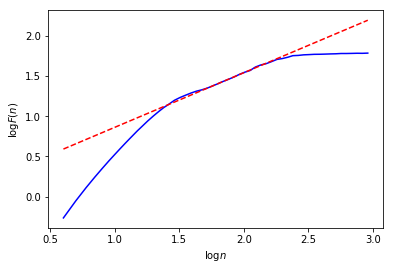

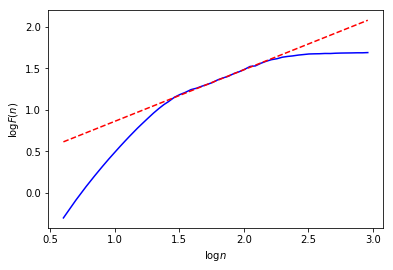

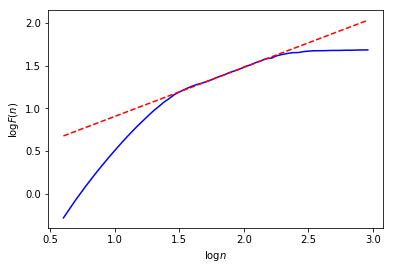

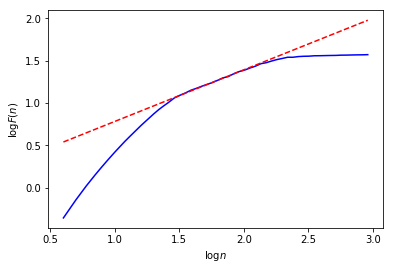

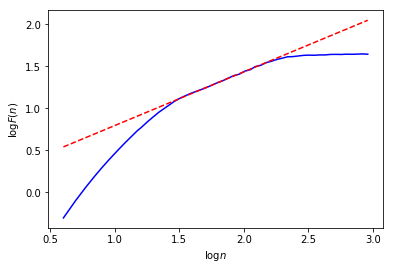

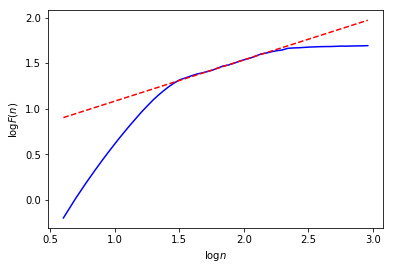

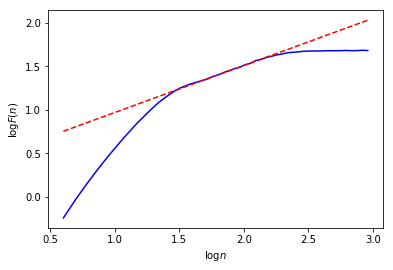

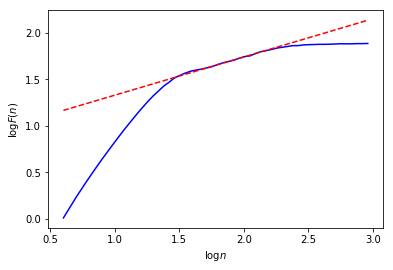

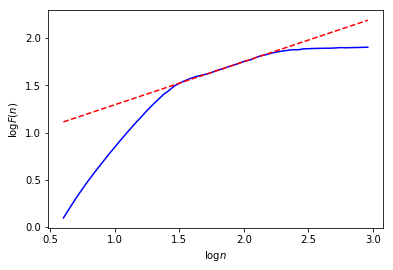

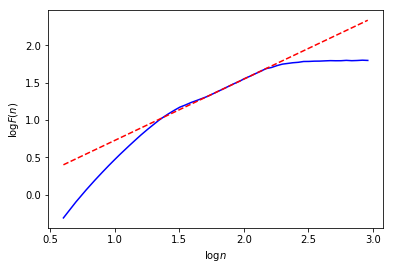

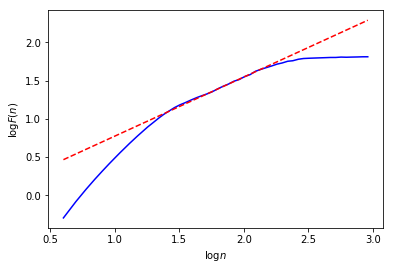

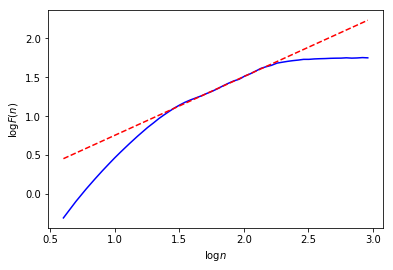

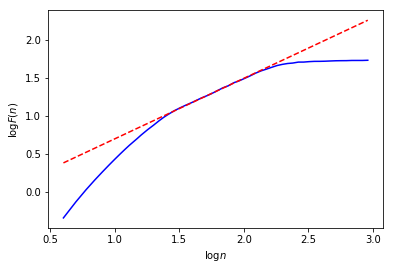

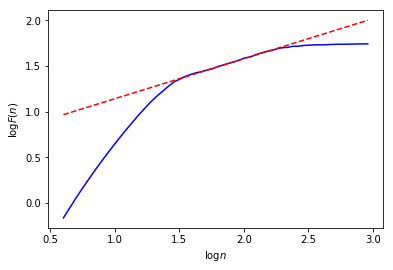

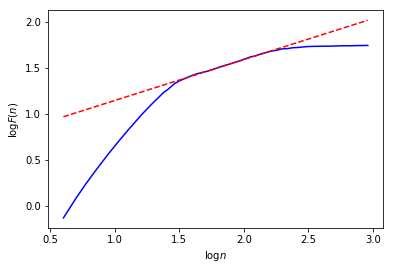

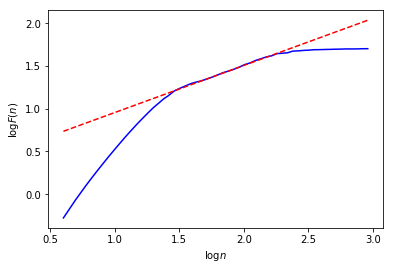

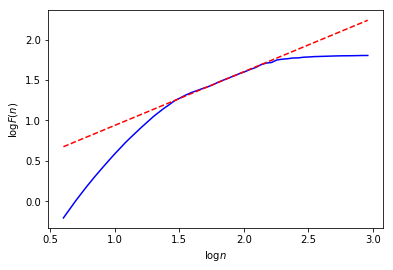

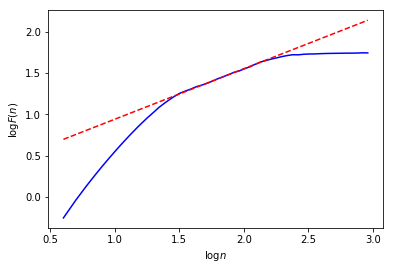

In [57]:
from lib.nolds.nolds import measures
debs = []
for channel in CHANNEL_NAMES:
    nvals = measures.logarithmic_n(4, 1000, 1.1)
    res, deb = measures.dfa(data[channel][:15000], nvals=nvals, debug_plot=True, debug_data=True, overlap=True, offset_begin=50, offset_end=30)
    debs.append(deb)
    # print(measures.dfa(data[channel][:15000], nvals=nvals, debug_plot=True, overlap=True, offset_begin=50, offset_end=30))

<Figure size 432x288 with 0 Axes>

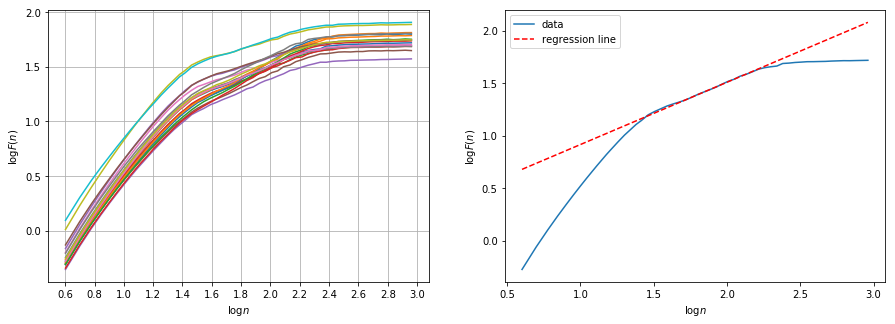

In [58]:
import matplotlib.pyplot as plt
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)
for deb in debs:
    logn = deb[0]
    logfn = deb[1]
    sl = deb[2][0]
    # plt.plot(logn, logfn)
    # plt.xlabel(f"$\log n$")
    # plt.ylabel(f"$\log F(n)$")
    ax[0].plot(logn, logfn)
    ax[0].grid()
    ax[0].locator_params(nbins=20, axis='x')
    ax[0].set_xlabel(f"$\log n$")
    ax[0].set_ylabel(f"$\log F(n)$")

ax[1].plot(debs[0][0], debs[0][1], label="data")
ax[1].plot(debs[0][0], np.polyval(debs[0][2], debs[0][0]), "r--", label="regression line")
ax[1].set_xlabel(f"$\log n$")
ax[1].set_ylabel(f"$\log F(n)$")
ax[1].legend()
plt.show()

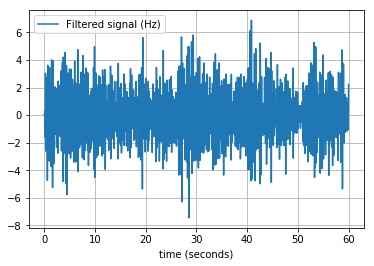

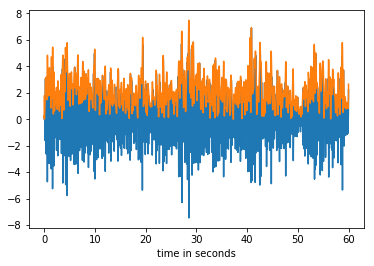

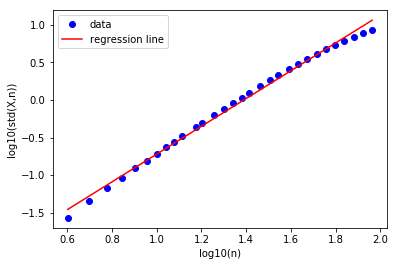

1.847772464730019


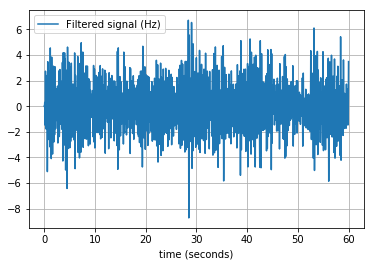

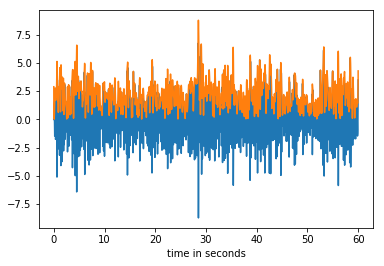

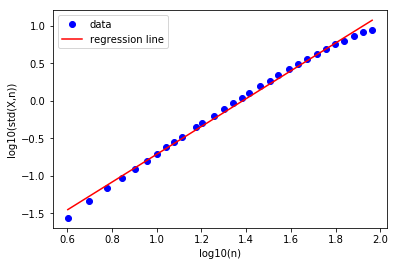

1.8543341815273695


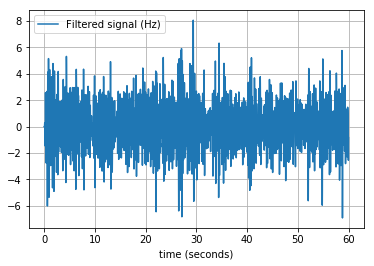

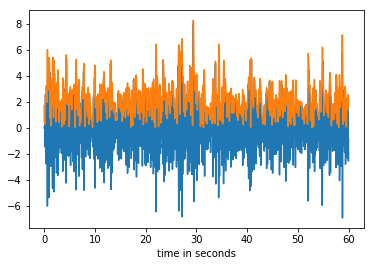

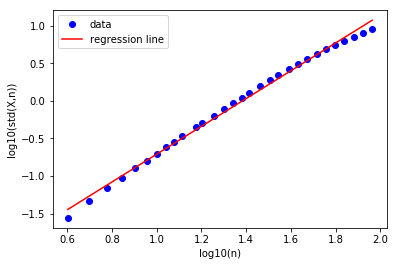

1.850537162039187


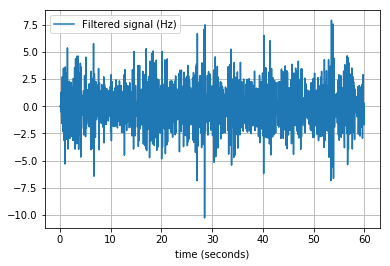

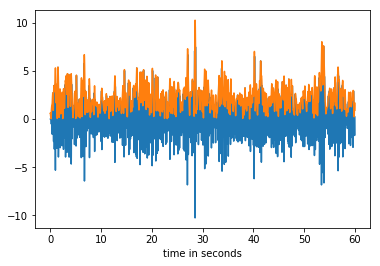

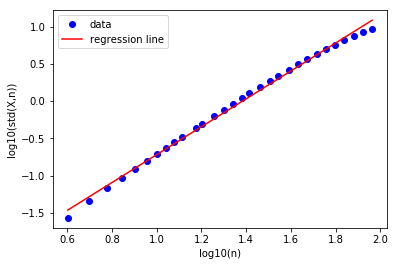

1.8702443011985612


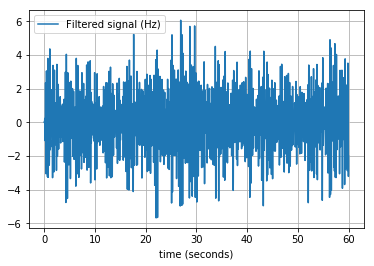

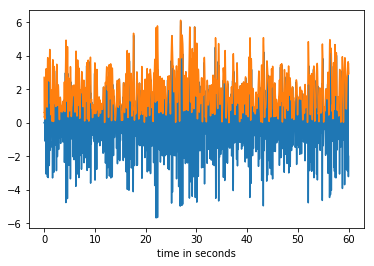

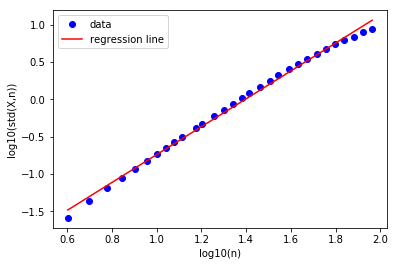

1.8663074959160841


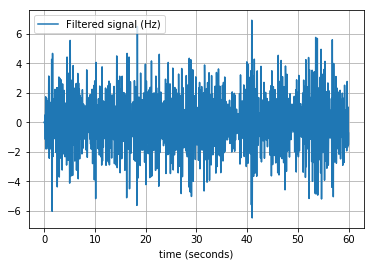

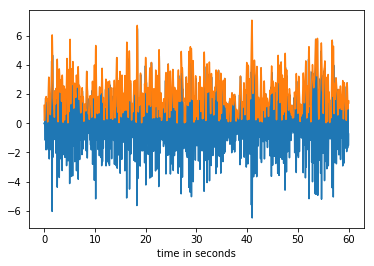

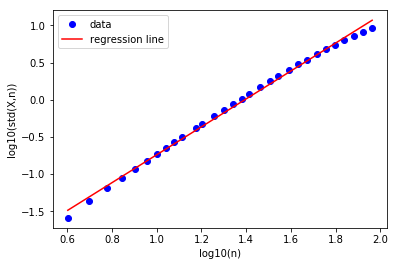

1.8754063447106841


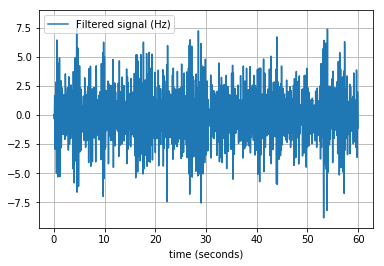

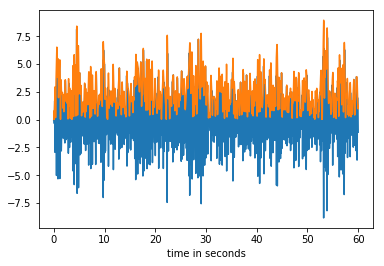

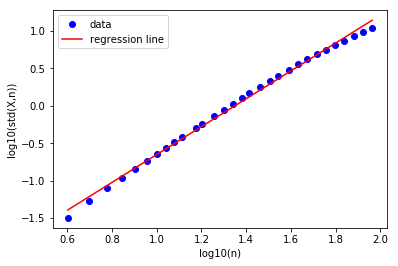

1.8633683525621147


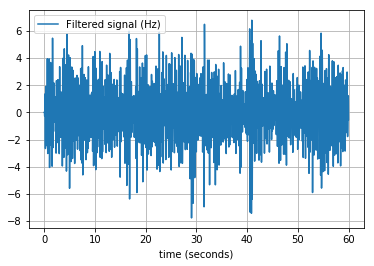

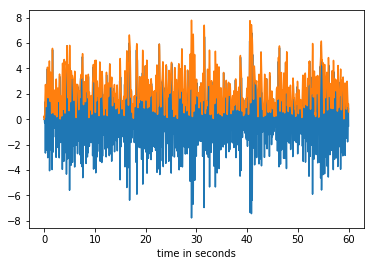

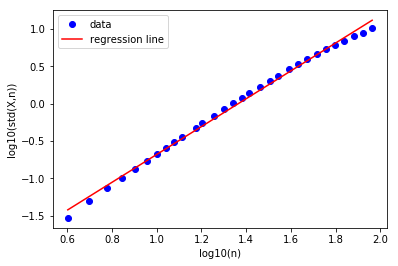

1.8637026849917684


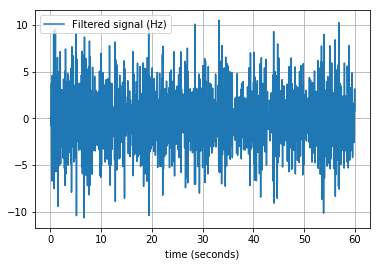

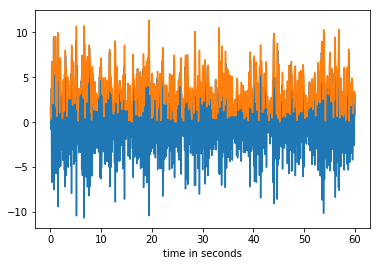

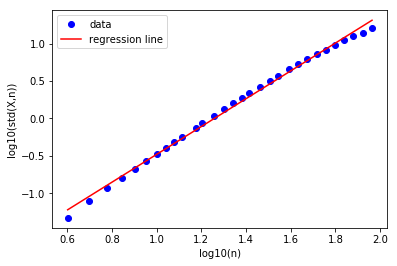

1.859974686106494


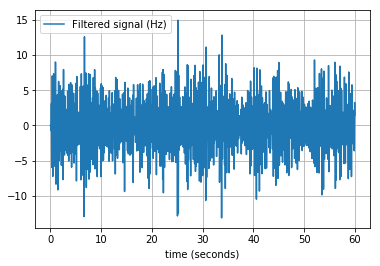

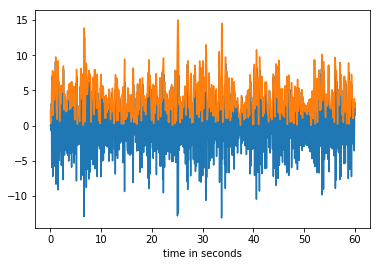

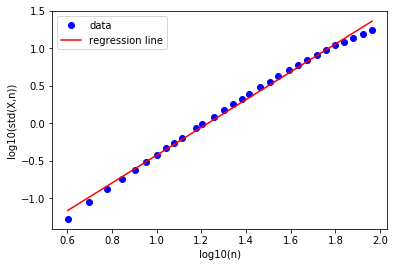

1.853110818738924


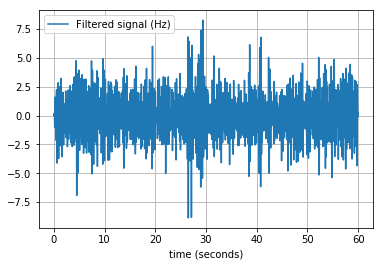

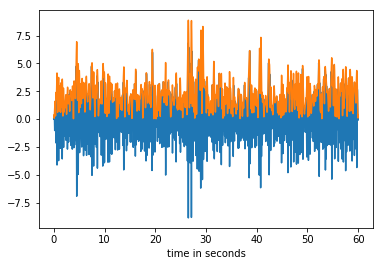

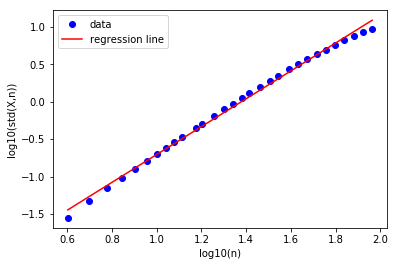

1.8642583750348125


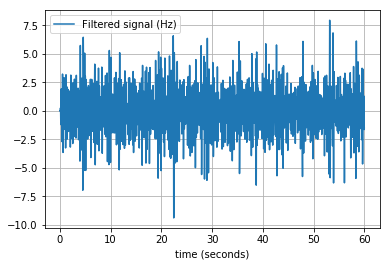

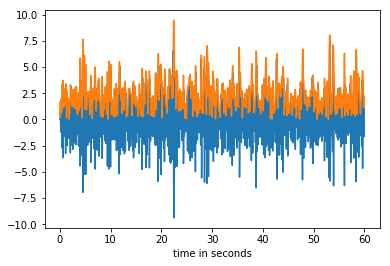

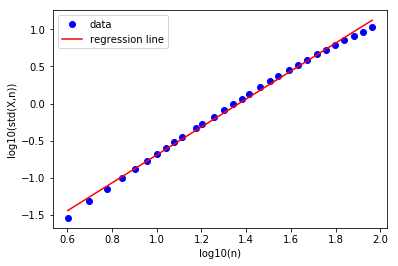

1.883743565010097


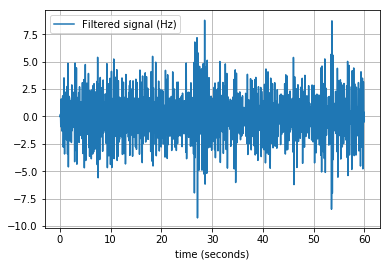

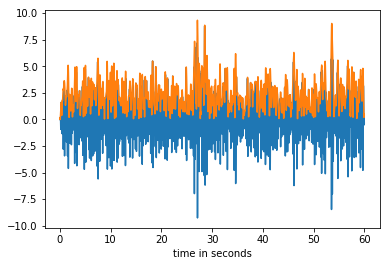

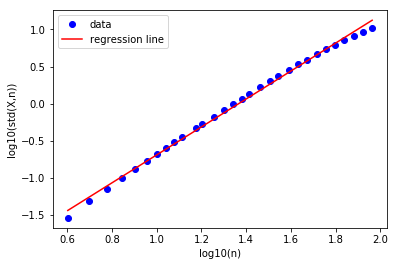

1.8812554722079835


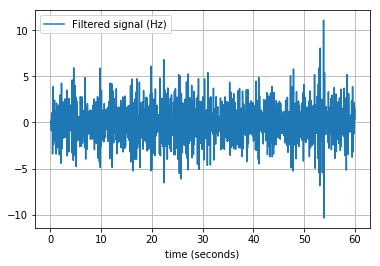

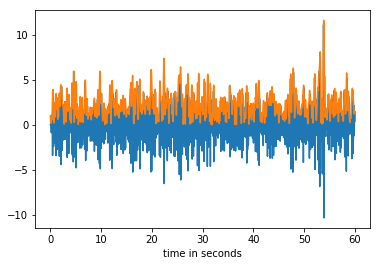

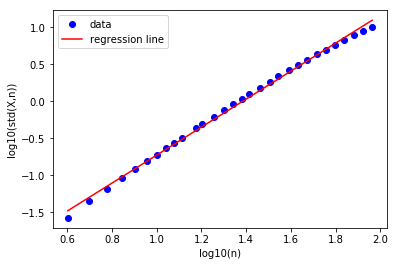

1.890451083339364


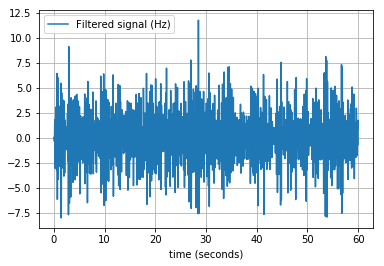

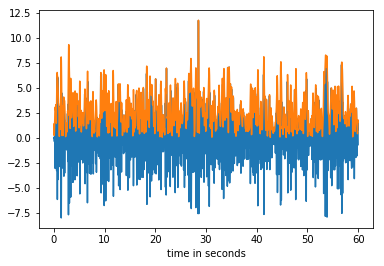

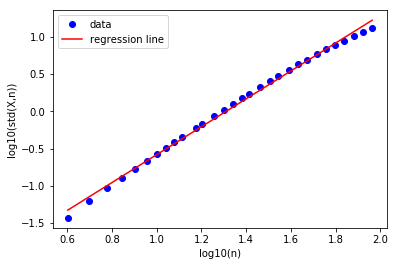

1.870015122066549


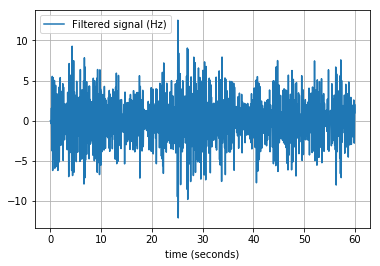

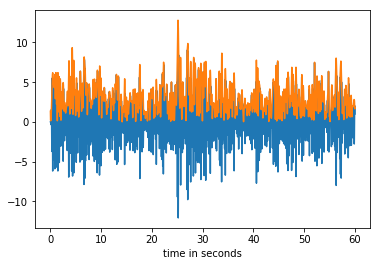

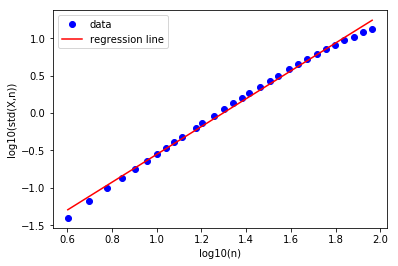

1.8597792836343152


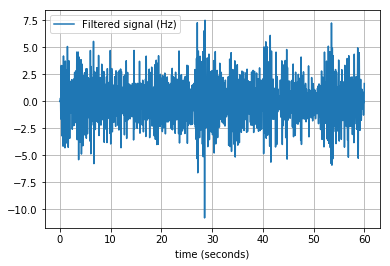

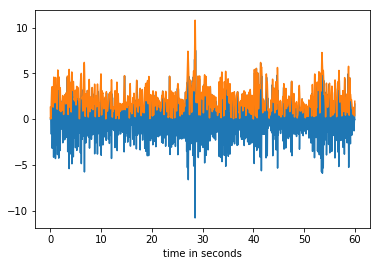

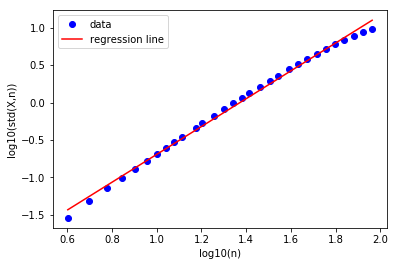

1.8587048959247066


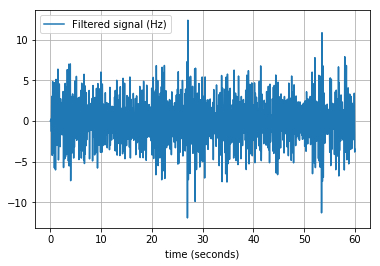

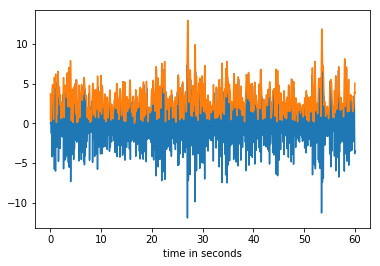

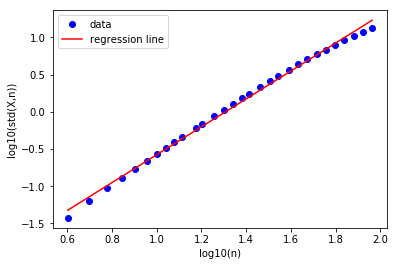

1.8748852825956768


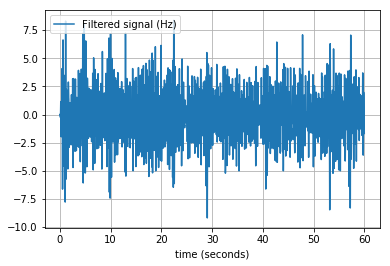

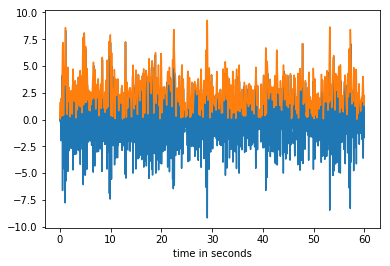

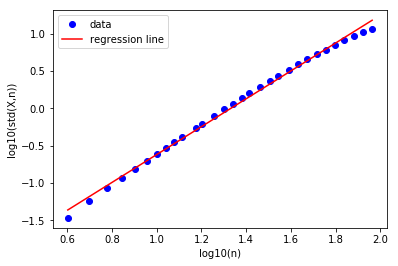

1.8654784869105805


In [7]:
# from scipy.signal import fftconvolve, lfilter, firwin
from scipy.signal import butter, sosfilt, sosfreqz, hilbert

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y
    
T = 60
fs = 250
lowcut = 3
highcut = 7
for channel in CHANNEL_NAMES:
    if fs*T > len(data[channel]):
        continue
    x = data[channel][:fs*T]
    t = np.linspace(0, T, len(x), endpoint=False)

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=5)

    plt.figure()
    plt.plot(t, y, label='Filtered signal (Hz)')
    plt.xlabel('time (seconds)')
    # plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.legend(loc='upper left')

    signal = y
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)

    fig = plt.figure()
    plt.plot(t, signal, label='signal')
    plt.plot(t, amplitude_envelope, label='envelope')
    plt.xlabel("time in seconds")
    plt.show()

    from lib.nolds.nolds import measures
    nvals = measures.logarithmic_n(4, 100, 1.1)
    print(measures.dfa(amplitude_envelope, nvals=nvals, debug_plot=True, overlap=True))
    plt.show()

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 20, 22, 24, 26, 29, 32, 35, 39, 43, 47, 52, 57, 63, 69, 76, 84, 92, 102, 112, 123, 136, 149, 164, 181, 199, 219, 240, 265, 291, 320, 352, 388, 426, 469, 516, 568, 624, 687, 756, 831, 915, 1006, 1107, 1217, 1339, 1473, 1621, 1783, 1961, 2157, 2373, 2610, 2871, 3158, 3474, 3822, 4204, 4625, 5087, 5596, 6155, 6771, 7448, 8193, 9012, 9914, 10905, 11996, 13195, 14515]


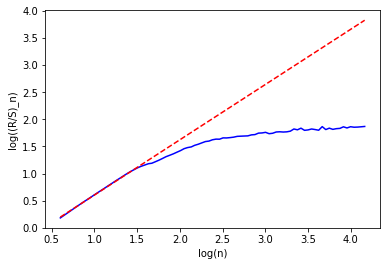

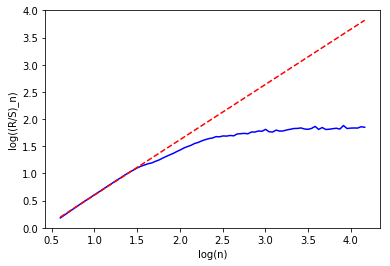

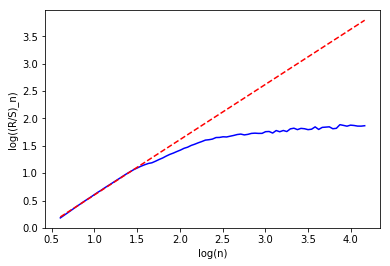

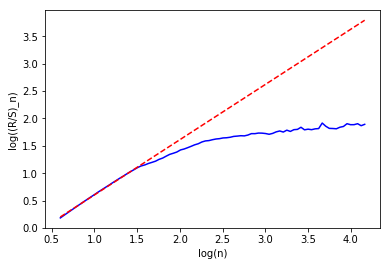

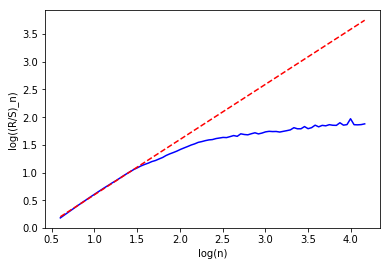

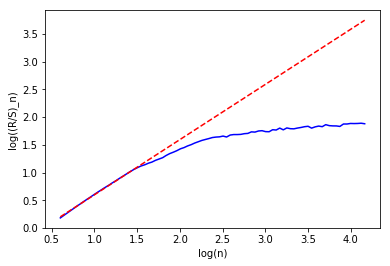

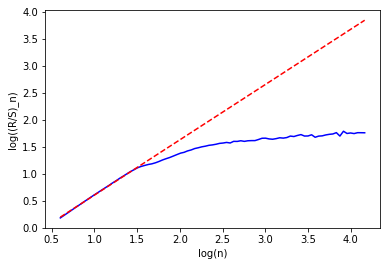

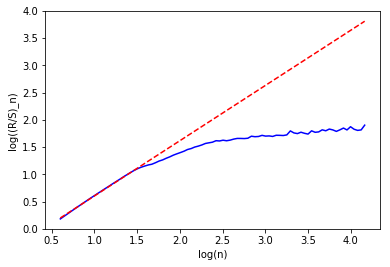

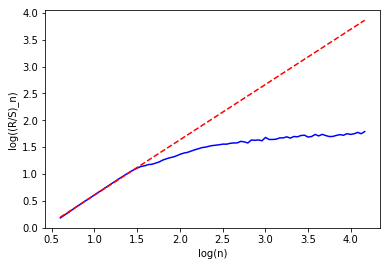

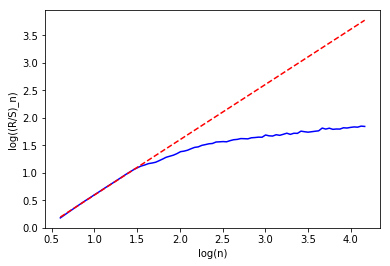

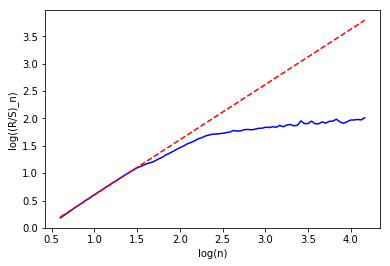

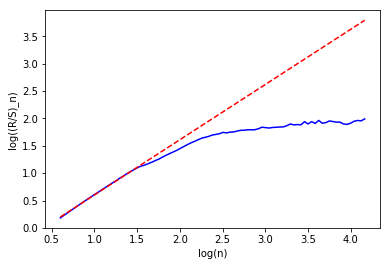

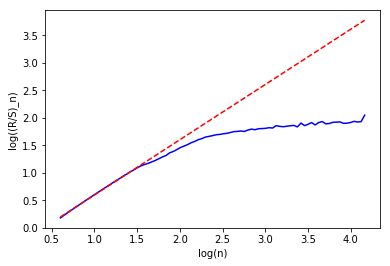

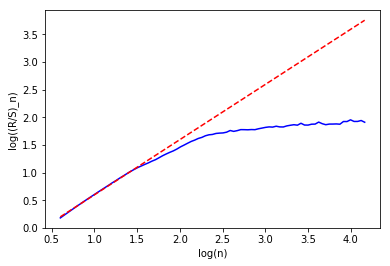

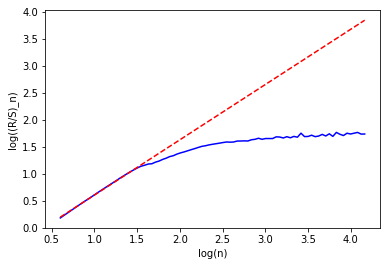

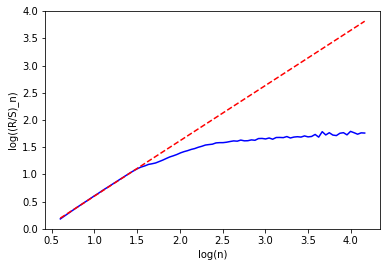

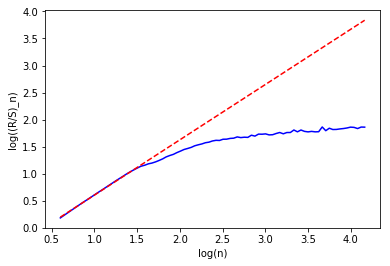

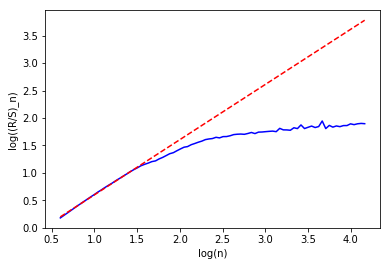

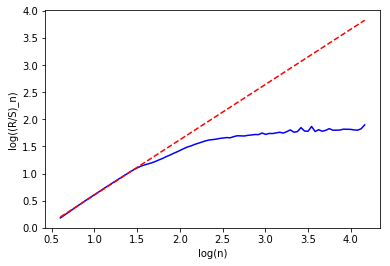

In [55]:
from lib.nolds.nolds import measures
# nvals = measures.logmid_n(15000, 0.25, 15)
nvals = measures.logarithmic_n(4, 15000, 1.1)
print(nvals)
deps = []
for channel in CHANNEL_NAMES:
    res, dep = measures.hurst_rs(data[channel][:15000], debug_plot=True, nvals=nvals, debug_data=True, corrected=False,
                                 offset_begin=0, offset_end=20)
    deps.append(dep)

<Figure size 432x288 with 0 Axes>

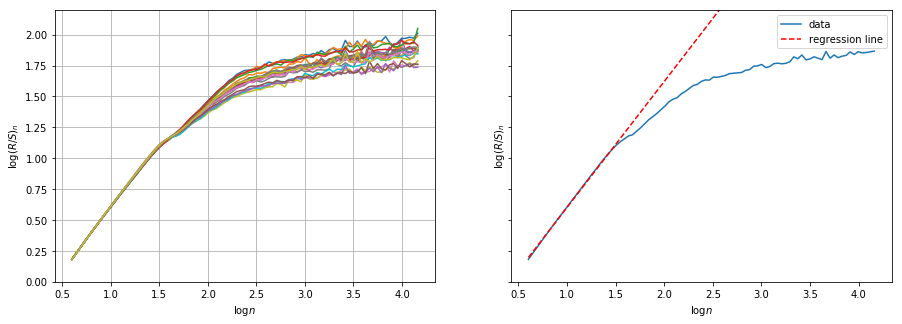

In [56]:
import matplotlib.pyplot as plt
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=True)
for deb in deps:
    logn = deb[0]
    logrs = deb[1]
    sl = deb[2][0]
    # plt.plot(logn, logfn)
    # plt.xlabel(f"$\log n$")
    # plt.ylabel(f"$\log F(n)$")
    ax[0].plot(logn, logrs)
    ax[0].grid()
    ax[0].set_xlabel(f"$\log n$")
    ax[0].set_ylabel(f"$\log (R/S)_n$")
    ax[0].set_ylim(0, 2.2)

ax[1].plot(deps[0][0], deps[0][1], label="data")
ax[1].plot(deps[0][0], np.polyval(deps[0][2], deps[0][0]), "r--", label="regression line")
ax[1].set_xlabel(f"$\log n$")
ax[1].set_ylabel(f"$\log (R/S)_n$")
ax[1].legend()
plt.show()

In [52]:
from lib.HiguchiFractalDimension.hfd import curve_length
def plot_lks(ax):
    for channel in CHANNEL_NAMES:
        k, L = curve_length(data[channel][:15000], opt=True, num_k=1000, k_max=200)
        hfd = np.polyfit(np.log10(k), np.log10(L), deg=1)
        ax.plot(np.log10(k), np.log10(L))
        ax.set_xlabel(f'$\log k$')
        ax.set_ylabel(f'$\log L(k)$')

In [53]:
k_maxmin = 20
k_maxmax = 500
num_k = 1000
def plot_inc_kmax(ax):
    for channel in CHANNEL_NAMES:
        hfds = []
        for k_max in np.arange(k_maxmin, k_maxmax+1, 10):
            k, L = curve_length(data[channel][:15000], opt=True, num_k=num_k, k_max=k_max)
            hfd = -np.polyfit(np.log2(k), np.log2(L), deg=1)[0]
            hfds.append(hfd)
        ax.plot(np.linspace(k_maxmin, k_maxmax, num=len(hfds)), hfds)
        ax.locator_params(nbins=20, axis='x')
        ax.grid()
        ax.set_xlabel(r'$k_{max}$')
        ax.set_ylabel(r'HFD')

<Figure size 432x288 with 0 Axes>

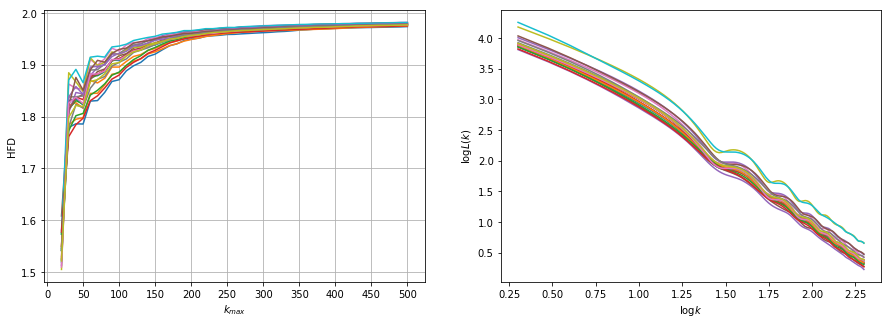

In [54]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)
plot_inc_kmax(ax[0])
plot_lks(ax[1])
plt.show()

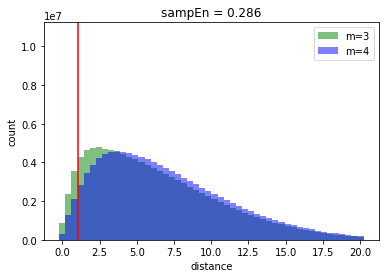

0.28552698143810207

In [3]:
from lib.nolds.nolds import measures as m
channel = 'FP1'

m.sampen(data[channel][:15000], emb_dim=2, tolerance=None, debug_plot=True)